In [427]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [428]:
import sqlite3



In [429]:

db_path = r'C:\Users\Eric\Desktop\loanapproval.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Read the table into a pandas DataFrame
df_sql = pd.read_sql_query("SELECT * FROM loan_approvals", conn)

# Close the connection
conn.close()

In [430]:
df_sql.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [431]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    object 
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 62.5+ KB


In [432]:
import numpy as np


# Fill empty cells with NULL (None in Python)
df_sql = df_sql.replace(r'^\s*$', np.nan, regex=True)

df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [433]:
df_sql.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [434]:
df_sql.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [435]:
df = df_sql

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [437]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [438]:
# check for null values
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [439]:
df_cleanednull = df.dropna()

df_cleanednull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [440]:
df_cleanednull = df_cleanednull.drop(['Loan_ID'], axis=1)

df_cleanednull.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


#### Data exploration

Loan_Status
Y    332
N    148
Name: count, dtype: int64


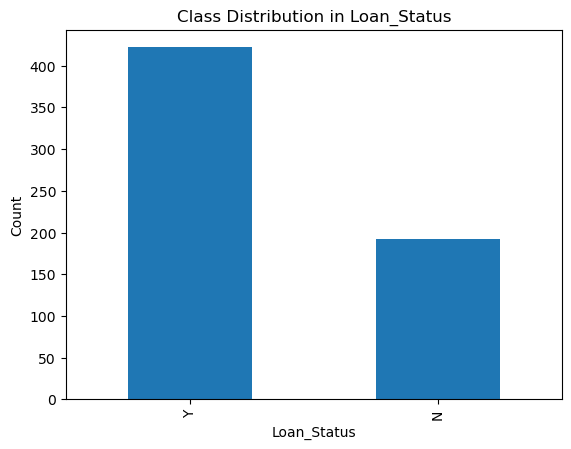

In [441]:
# Check the distribution of the target variable
print(df_cleanednull['Loan_Status'].value_counts())

df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

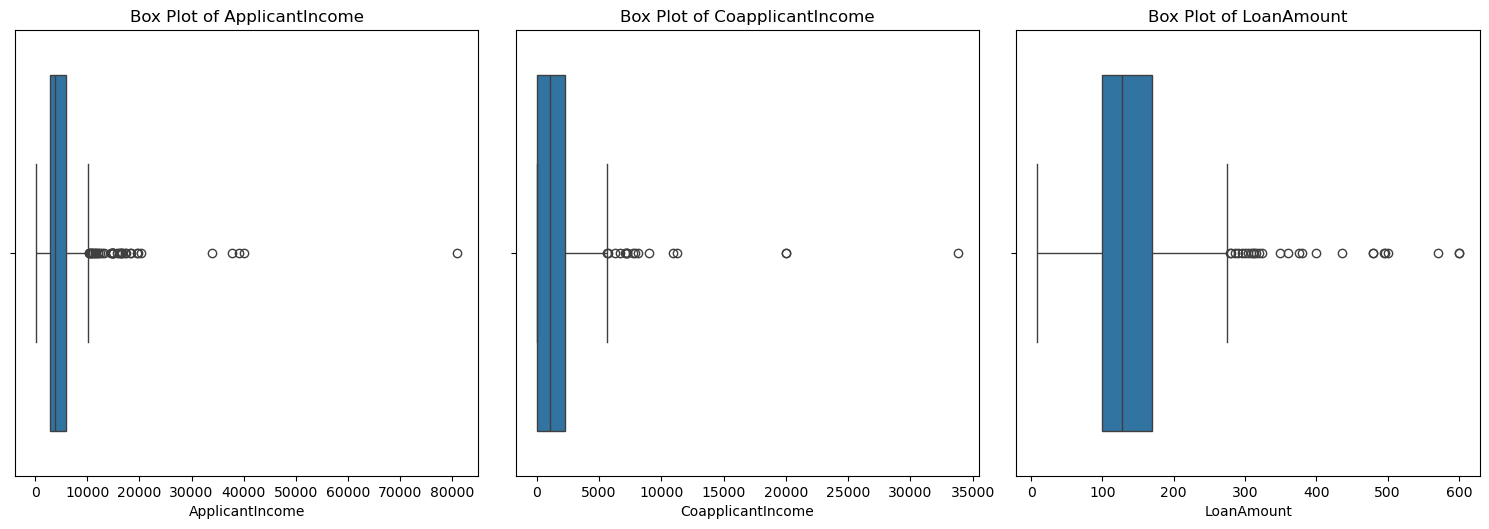

In [442]:
# Check outliers

# Select numerical features, excluding Loan_Amount_Term and Credit_History
numerical_features = df_cleanednull.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(['Loan_Amount_Term', 'Credit_History'])

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_cleanednull[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [443]:
df_cleanednull.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender
Male      394
Female     86
Name: count, dtype: int64


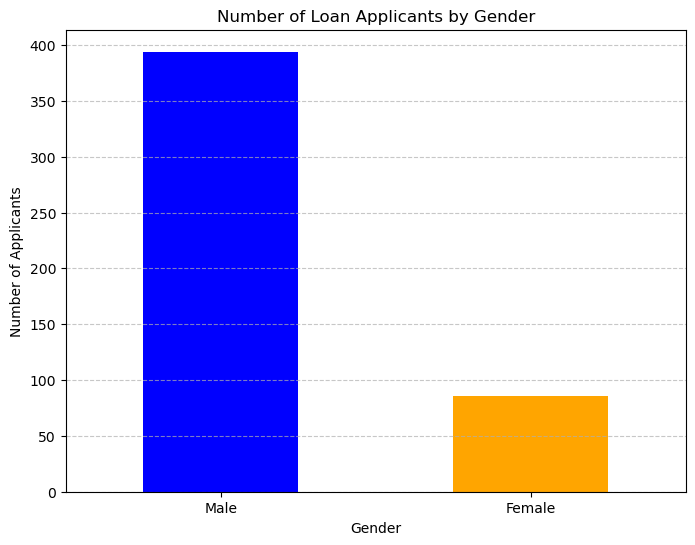

In [444]:
print(df_cleanednull['Gender'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Gender'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From above we can see that most gender that applies for loans are men

Married
Yes    311
No     169
Name: count, dtype: int64


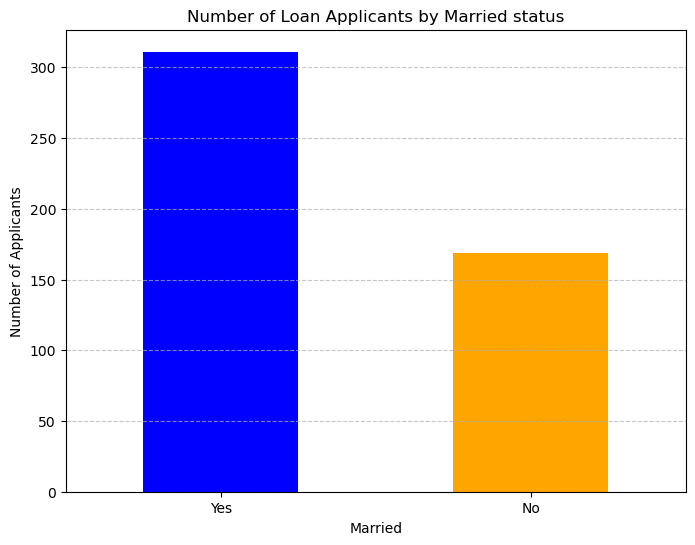

In [445]:
print(df_cleanednull['Married'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Married'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Married status')
plt.xlabel('Married')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Those who are married are the ones who apply for loans most than those who are not.

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64


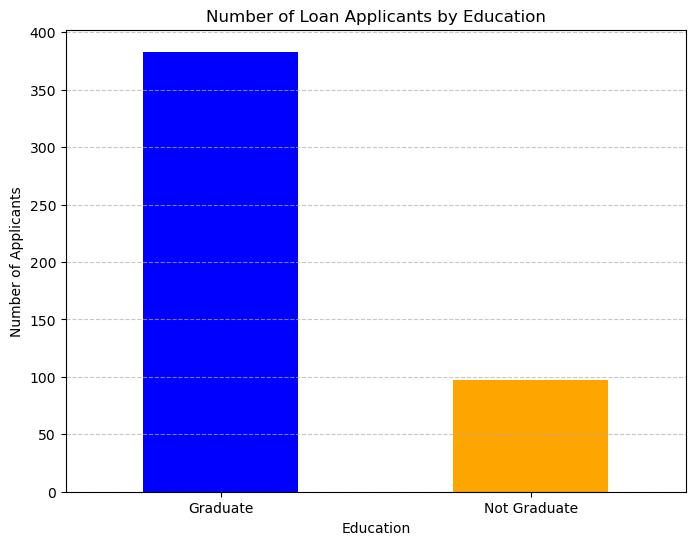

In [446]:
print(df_cleanednull['Education'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Education'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Education')
plt.xlabel('Education')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most applicants are Graduates compared to non Graduates

Self_Employed
No     414
Yes     66
Name: count, dtype: int64


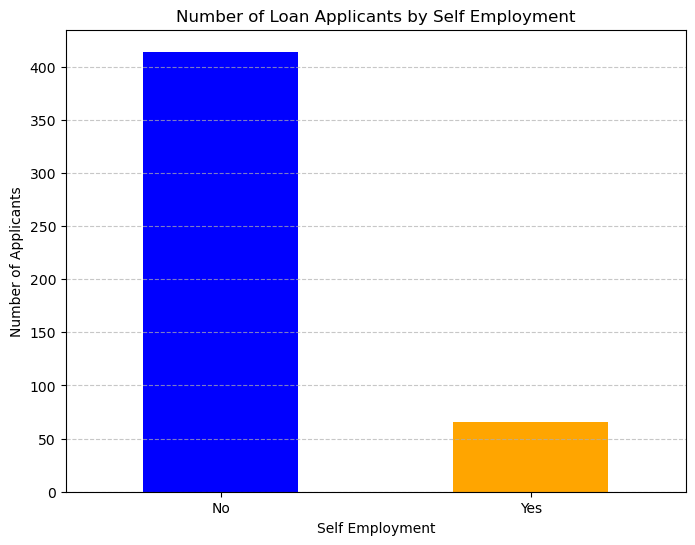

In [447]:
print(df_cleanednull['Self_Employed'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Self_Employed'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Self Employment')
plt.xlabel('Self Employment')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most applicants are not self employed compared to those self employed

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


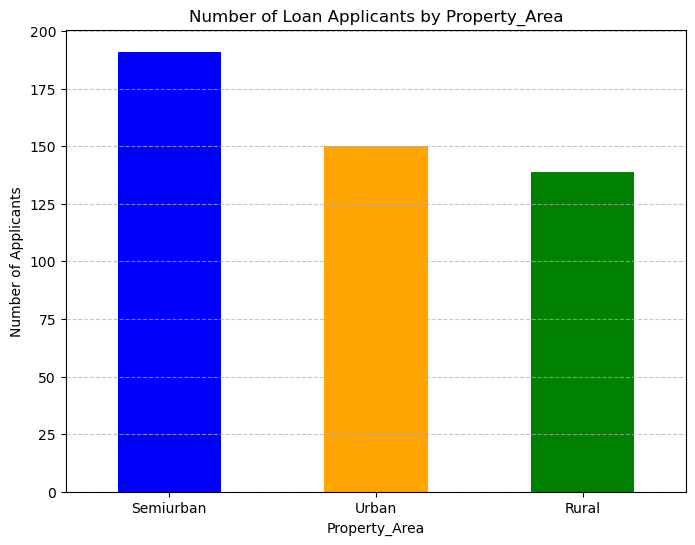

In [448]:
print(df_cleanednull['Property_Area'].value_counts())


# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Property_Area'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Loan Applicants by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Number of applicants by property area the Semiurban are the most followed by urban and rural respectfully.

In [449]:
# Select only int64 and float64 columns
numeric_columns = df_cleanednull.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_cleanednull[numeric_columns]

# Print the selected columns to verify
print("Columns included in correlation analysis:", df_numeric.columns.tolist())

Columns included in correlation analysis: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [450]:
# Compute the correlation matrix
correlation_matrix = df_numeric.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


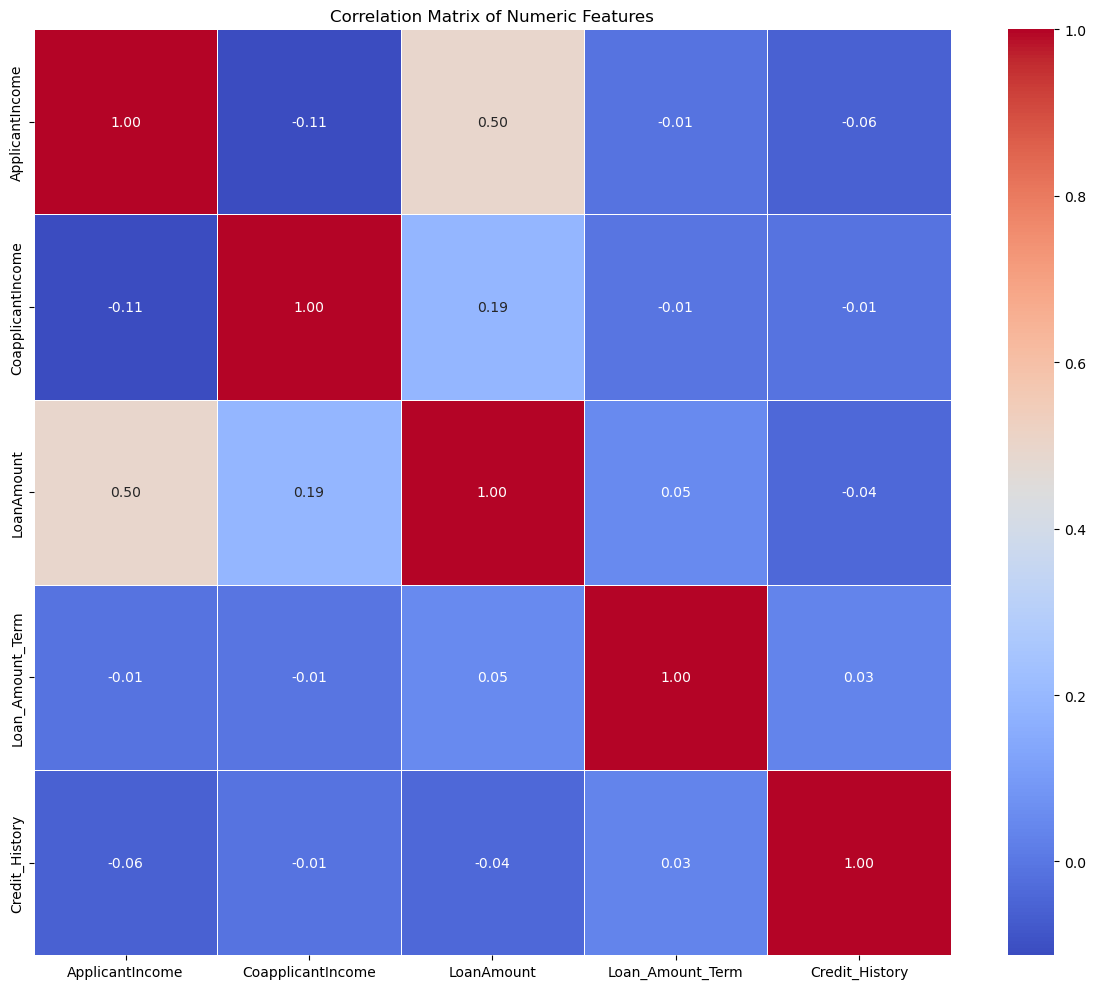

In [451]:
# Plot the heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()  
plt.show()

- If an applicant's income is high, they are more likely to receive a larger loan, though the relationship isn’t perfect.

In [452]:
# Chi-square test for categorical variables

import seaborn as sns
from scipy import stats

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


for col in categorical_cols:
    contingency_table = pd.crosstab(df_cleanednull[col], df_cleanednull['Loan_Status'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"p-value: {p_value}")
    print("--------------------")

Chi-square test for Gender:
p-value: 0.1990183114281211
--------------------
Chi-square test for Married:
p-value: 0.01840545638635538
--------------------
Chi-square test for Dependents:
p-value: 0.40720999848682704
--------------------
Chi-square test for Education:
p-value: 0.16872400009733113
--------------------
Chi-square test for Self_Employed:
p-value: 0.5371943232746994
--------------------
Chi-square test for Property_Area:
p-value: 0.0022139594148752133
--------------------


- Gender (p-value: 0.1990) This p-value is greater than 0.05, suggesting that gender doesn't have a significant relationship with loan approval.
- Married (p-value: 0.0184) This p-value is less than 0.05, indicating a significant relationship between marital status and loan approval, possibly because they often have dual incomes or are perceived as more stable.
- Dependents (p-value: 0.4072) This high p-value suggests no significant relationship between the number of dependents and loan approval.
- Education (p-value: 0.1687) This p-value is greater than 0.05, suggesting no significant relationship between education level and loan approval.
- Self_Employed (p-value: 0.5371) This high p-value indicates no significant relationship between self-employment status and loan approval.
- Property_Area (p-value: 0.0022) a very low p-value suggests a strong significant relationship between the property area and loan approval.



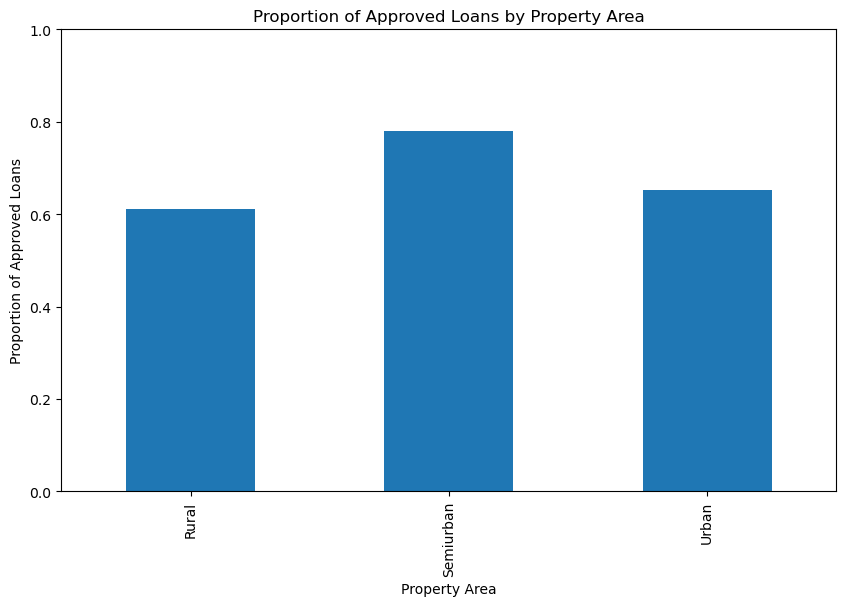

In [453]:
# Visualize the proportion of loan approvals for each Property_Area

crosstab = pd.crosstab(df_cleanednull['Property_Area'], df_cleanednull['Loan_Status'], normalize='index')

plt.figure(figsize=(10, 6))
crosstab['Y'].plot(kind='bar')
plt.title('Proportion of Approved Loans by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Proportion of Approved Loans')
plt.ylim(0, 1)
plt.show()

In [454]:
# Property Area and Loan Status.

# Print the crosstab
print("Proportion of loan approvals by Property Area:")
print(crosstab)


Proportion of loan approvals by Property Area:
Loan_Status           N         Y
Property_Area                    
Rural          0.388489  0.611511
Semiurban      0.219895  0.780105
Urban          0.346667  0.653333


- Semiurban Areas Have the highest approval rate at 78.01% Urban Areas Have the second-highest approval rate at 65.33%.

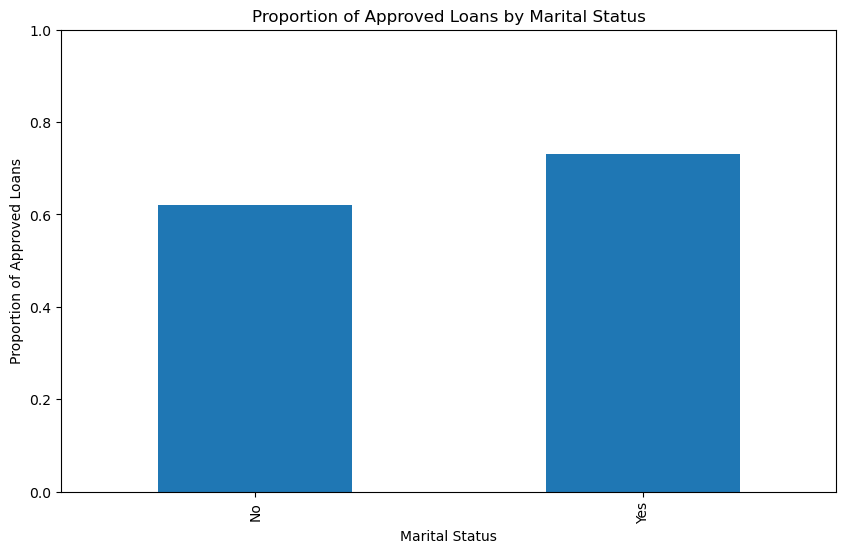

In [455]:
# Create a crosstab of Married and Loan_Status
crosstab = pd.crosstab(df_cleanednull['Married'], df_cleanednull['Loan_Status'])

# Calculate percentages
crosstab_percentages = crosstab.div(crosstab.sum(axis=1), axis=0)

# Visualize the proportion of loan approvals for each Marital Status
plt.figure(figsize=(10, 6))
crosstab_percentages['Y'].plot(kind='bar')
plt.title('Proportion of Approved Loans by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Approved Loans')
plt.ylim(0, 1)
plt.show()

In [456]:


print("Loan approval counts by Marital Status:")
print(crosstab)
print("\nProportion of loan approvals by Marital Status:")
print(crosstab_percentages)

Loan approval counts by Marital Status:
Loan_Status   N    Y
Married             
No           64  105
Yes          84  227

Proportion of loan approvals by Marital Status:
Loan_Status         N         Y
Married                        
No           0.378698  0.621302
Yes          0.270096  0.729904


- Married applicants have a higher approval rate (72.99%) compared to unmarried applicants (62.13%).

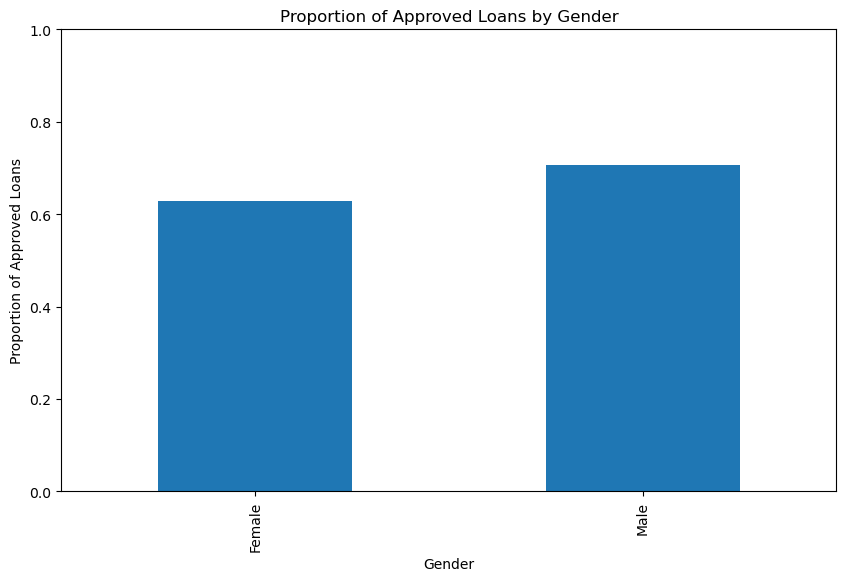

In [457]:
# Create a crosstab of Gender and Loan_Status
crosstab = pd.crosstab(df_cleanednull['Gender'], df_cleanednull['Loan_Status'])

# Calculate percentages
crosstab_percentages = crosstab.div(crosstab.sum(axis=1), axis=0)

# Visualize the proportion of loan approvals for each Gender
plt.figure(figsize=(10, 6))
crosstab_percentages['Y'].plot(kind='bar')
plt.title('Proportion of Approved Loans by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Approved Loans')
plt.ylim(0, 1)
plt.show()

In [458]:
# Print the crosstab
print("Loan approval counts by Gender:")
print(crosstab)
print("\nProportion of loan approvals by Gender:")
print(crosstab_percentages)

Loan approval counts by Gender:
Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278

Proportion of loan approvals by Gender:
Loan_Status         N         Y
Gender                         
Female       0.372093  0.627907
Male         0.294416  0.705584


- Male applicants have a higher approval rate (70.56%) compared to female applicants (62.79%).

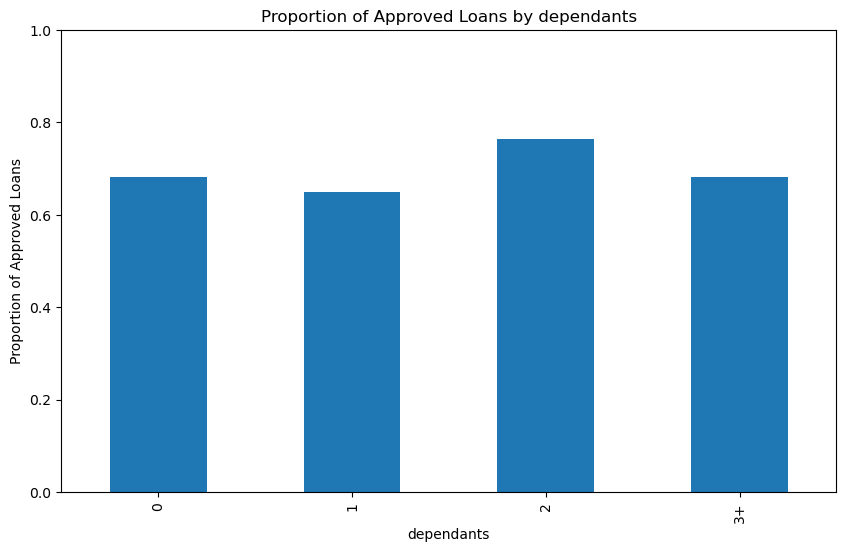

In [459]:
# Create a crosstab of the dependants and Loan_Status
crosstab = pd.crosstab(df_cleanednull['Dependents'], df_cleanednull['Loan_Status'])

# Calculate percentages
crosstab_percentages = crosstab.div(crosstab.sum(axis=1), axis=0)

# Visualize the proportion of loan approvals
plt.figure(figsize=(10, 6))
crosstab_percentages['Y'].plot(kind='bar')
plt.title(f'Proportion of Approved Loans by dependants')
plt.xlabel('dependants')
plt.ylabel('Proportion of Approved Loans')
plt.ylim(0, 1)
plt.show()

In [460]:
# Print the crosstab
print("Loan approval counts by dependants:")
print(crosstab)
print("\nProportion of loan approvals by dependants:")
print(crosstab_percentages)

Loan approval counts by dependants:
Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28

Proportion of loan approvals by dependants:
Loan_Status         N         Y
Dependents                     
0            0.317518  0.682482
1            0.350000  0.650000
2            0.235294  0.764706
3+           0.317073  0.682927


- 0 Dependents: 68.25% approval rate
1 Dependent: 65.00% approval rate
2 Dependents: 76.47% approval rate
3+ Dependents: 68.29% approval rate

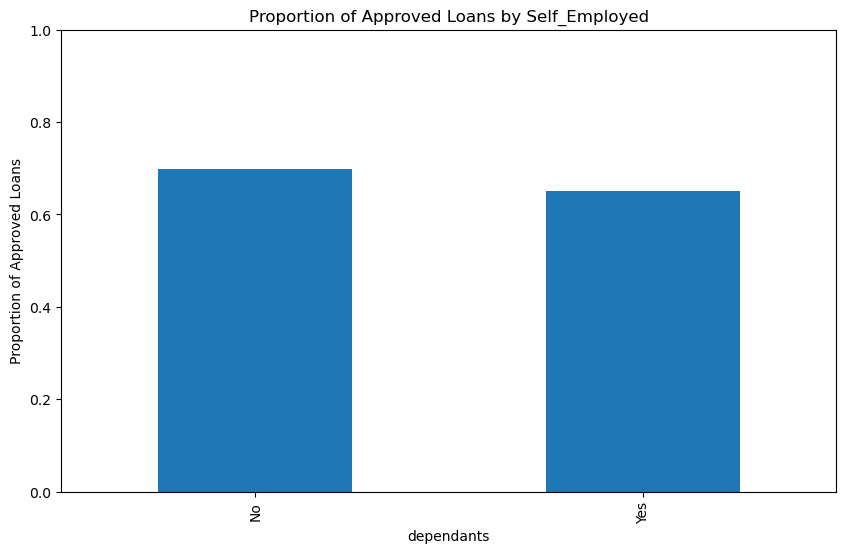

In [461]:
# Create a crosstab of the dependants and Loan_Status
crosstab = pd.crosstab(df_cleanednull['Self_Employed'], df_cleanednull['Loan_Status'])

# Calculate percentages
crosstab_percentages = crosstab.div(crosstab.sum(axis=1), axis=0)

# Visualize the proportion of loan approvals
plt.figure(figsize=(10, 6))
crosstab_percentages['Y'].plot(kind='bar')
plt.title(f'Proportion of Approved Loans by Self_Employed')
plt.xlabel('dependants')
plt.ylabel('Proportion of Approved Loans')
plt.ylim(0, 1)
plt.show()

In [462]:
print("Loan approval counts by Self_Employed")
print(crosstab)
print("\nProportion of loan approved") 
print(crosstab_percentages)

Loan approval counts by Self_Employed
Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43

Proportion of loan approved
Loan_Status           N         Y
Self_Employed                    
No             0.301932  0.698068
Yes            0.348485  0.651515


- Not Self-Employed applicants have a slightly higher approval rate (69.81%) compared to Self-Employed applicants (65.15%)

In [463]:
# T-test for numerical variables

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numerical_cols:
    t_stat, p_value = stats.ttest_ind(df_cleanednull[df_cleanednull['Loan_Status'] == 'Y'][col], 
                                      df_cleanednull[df_cleanednull['Loan_Status'] == 'N'][col])
    print(f"T-test for {col}:")
    print(f"p-value: {p_value}")
    print("--------------------")

T-test for ApplicantIncome:
p-value: 0.34548738715837346
--------------------
T-test for CoapplicantIncome:
p-value: 0.2838062247641273
--------------------
T-test for LoanAmount:
p-value: 0.11642791040850191
--------------------
T-test for Loan_Amount_Term:
p-value: 0.8647002051603501
--------------------
T-test for Credit_History:
p-value: 5.033190633847646e-36
--------------------


- ApplicantIncome (p-value: 0.3455)
This p-value is much larger than 0.05, suggesting no significant difference in applicant income between approved and non-approved loans.
- CoapplicantIncome (p-value: 0.2838)
Again, this p-value is larger than 0.05, indicating no significant difference in co-applicant income between the two groups.
- LoanAmount (p-value: 0.1164)
This p-value is closer to 0.05, but still above it, suggesting a possible trend but not a statistically significant difference in loan amounts between approved and non-approved applications.
- Credit_History (p-value: 5.033e-36)
This extremely low p-value (much smaller than 0.05) indicates a highly significant difference in credit history between approved and non-approved loans.


#### Feature Enginnering and selection

In [464]:
# feature engineering

df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [465]:
# Make new feature total income

df_cleanednull['Total_Income'] = df_cleanednull['ApplicantIncome'] + df_cleanednull['CoapplicantIncome']

df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


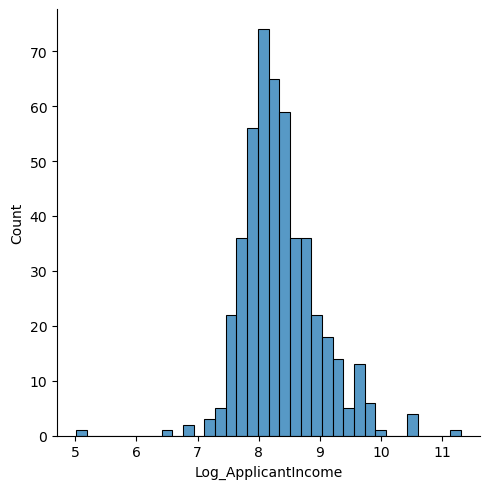

In [466]:
# log transformation normalization to handle skewed data making the distribution more symmetric and closer to a normal distribution.
import numpy as np

df_cleanednull['Log_ApplicantIncome'] = np.log1p(df_cleanednull['ApplicantIncome'])


sns.displot(df_cleanednull['Log_ApplicantIncome'])

- reduce the impact of extreme income outliers on the logistic regression model.The log1p function is used to handle zero values if there. 

In [467]:
df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,8.597482


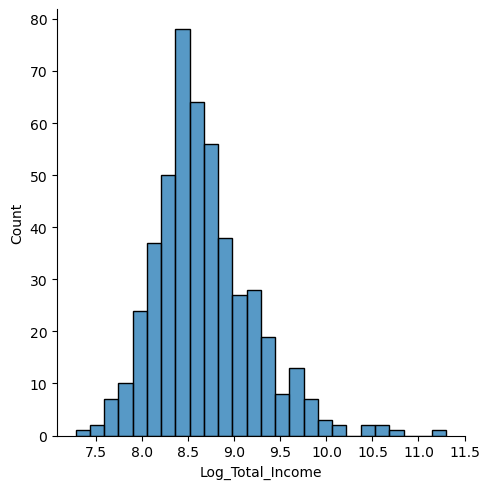

In [468]:
df_cleanednull['Log_Total_Income'] = np.log1p(df_cleanednull['Total_Income'])


sns.displot(df_cleanednull['Log_Total_Income'])

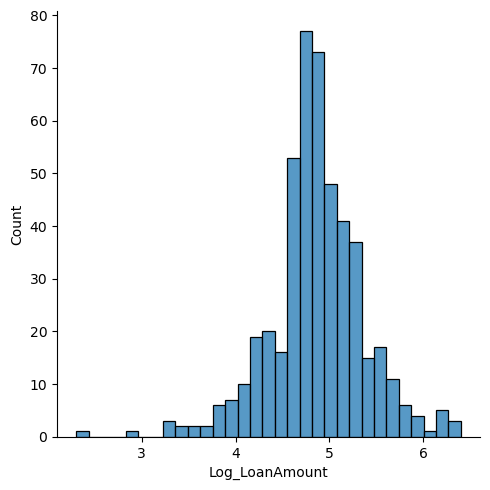

In [469]:
df_cleanednull['Log_LoanAmount'] = np.log1p(df_cleanednull['LoanAmount'])


sns.displot(df_cleanednull['Log_LoanAmount'])

In [470]:
df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,8.714732,4.859812
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,8.006701,4.204693
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,8.505525,4.795791
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,8.699681,4.955827
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,8.597482,9.170976,5.590987


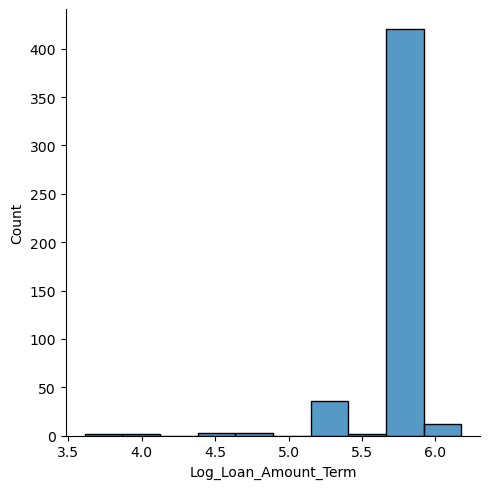

In [471]:
df_cleanednull['Log_Loan_Amount_Term'] = np.log1p(df_cleanednull['Loan_Amount_Term'])


sns.displot(df_cleanednull['Log_Loan_Amount_Term'])

In [472]:
df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,8.714732,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,8.505525,4.795791,5.888878
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,8.699681,4.955827,5.888878
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,8.597482,9.170976,5.590987,5.888878


In [473]:
# Dropping coloumns 

df_cleanednull = df_cleanednull.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)



dropping the original features,  ensures that the model doesn't get confused by redundant or less informative data, thus improving its predictive performance.

In [474]:
df_cleanednull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                480 non-null    object 
 1   Married               480 non-null    object 
 2   Dependents            480 non-null    object 
 3   Education             480 non-null    object 
 4   Self_Employed         480 non-null    object 
 5   Credit_History        480 non-null    float64
 6   Property_Area         480 non-null    object 
 7   Loan_Status           480 non-null    object 
 8   Log_ApplicantIncome   480 non-null    float64
 9   Log_Total_Income      480 non-null    float64
 10  Log_LoanAmount        480 non-null    float64
 11  Log_Loan_Amount_Term  480 non-null    float64
dtypes: float64(5), object(7)
memory usage: 48.8+ KB


In [475]:
# one hot encoding
df_encoded = pd.get_dummies(df_cleanednull, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])
df_encoded.head()


,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,N,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,Y,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,Y,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,Y,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,Y,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [476]:
# Label encoding

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_encoded['Loan_Status'] = label_encoder.fit_transform(df_encoded['Loan_Status'])

df_encoded.head()

,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,0,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,1,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,1,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,1,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,1,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [477]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               480 non-null    object 
 1   Credit_History           480 non-null    float64
 2   Loan_Status              480 non-null    int32  
 3   Log_ApplicantIncome      480 non-null    float64
 4   Log_Total_Income         480 non-null    float64
 5   Log_LoanAmount           480 non-null    float64
 6   Log_Loan_Amount_Term     480 non-null    float64
 7   Gender_Female            480 non-null    bool   
 8   Gender_Male              480 non-null    bool   
 9   Married_No               480 non-null    bool   
 10  Married_Yes              480 non-null    bool   
 11  Education_Graduate       480 non-null    bool   
 12  Education_Not Graduate   480 non-null    bool   
 13  Self_Employed_No         480 non-null    bool   
 14  Self_Employed_Yes        480 no

In [478]:
df_encoded.head()

,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,0,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,1,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,1,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,1,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,1,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [479]:
df_encoded['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [480]:
df_encoded['Dependents'].dtype

dtype('O')

In [481]:
# Fill missing values with a default value, e.g., 0
df_encoded['Dependents'].fillna(0, inplace=True)

# Replace '3+' with 3
df_encoded['Dependents'] = df_encoded['Dependents'].replace('3+', 3)

# Convert the column to int64
df_encoded['Dependents'] = df_encoded['Dependents'].astype('int64')


In [482]:
df_encoded.head()



,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,0,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,1,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,1,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,1,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,1,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [483]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               480 non-null    int64  
 1   Credit_History           480 non-null    float64
 2   Loan_Status              480 non-null    int32  
 3   Log_ApplicantIncome      480 non-null    float64
 4   Log_Total_Income         480 non-null    float64
 5   Log_LoanAmount           480 non-null    float64
 6   Log_Loan_Amount_Term     480 non-null    float64
 7   Gender_Female            480 non-null    bool   
 8   Gender_Male              480 non-null    bool   
 9   Married_No               480 non-null    bool   
 10  Married_Yes              480 non-null    bool   
 11  Education_Graduate       480 non-null    bool   
 12  Education_Not Graduate   480 non-null    bool   
 13  Self_Employed_No         480 non-null    bool   
 14  Self_Employed_Yes        480 no

In [484]:
# Dependent and independent features


# Independent features (all columns except 'Loan_Status')
X = df_encoded.drop(columns=['Loan_Status'])

# Dependent feature (target variable)
y = df_encoded['Loan_Status']

# Display the shapes of X and y to confirm
print("Independent features (X) shape:", X.shape)
print("Dependent feature (y) shape:", y.shape)

Independent features (X) shape: (480, 17)
Dependent feature (y) shape: (480,)


#### Logistic regression model

In [485]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier





In [486]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (384, 17)
Testing features shape: (96, 17)
Training target shape: (384,)
Testing target shape: (96,)


In [487]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [488]:
# Predict the target values on the test set
y_pred = log_reg.predict(X_test)


In [489]:
# Calculate accuracy
accuracyLog = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracyLog:.2f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Logistic Regression Accuracy: 0.82
Confusion Matrix:
[[11 17]
 [ 0 68]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [490]:
from sklearn.model_selection import cross_val_score, KFold


# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scoreslog_reg = cross_val_score(log_reg, X, y, cv=kfold, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores for Logistic Regression:", cv_scoreslog_reg)
print("Mean Accuracy for Logistic Regression:", cv_scoreslog_reg.mean())
print("Standard Deviation of Accuracy for Logistic Regression:", cv_scoreslog_reg.std())

Cross-Validation Scores for Logistic Regression: [0.82291667 0.76041667 0.88541667 0.72916667 0.85416667]
Mean Accuracy for Logistic Regression: 0.8104166666666666
Standard Deviation of Accuracy for Logistic Regression: 0.05796011559684815


Accuracy of 82% suggests the model is generally good at predicting loan approval status.
Confusion Matrix shows that while the model is good at predicting approvals (1), it struggles with correctly predicting rejections (0).
Classification Report reveals that the model performs well in identifying loans approved (1), but its ability to detect rejected loans (0) could be improved. The high precision for 0 but low recall indicates that the model rarely predicts rejections, and when it does, it’s usually correct, but it misses many actual rejections. For 1, the model performs well overall, correctly identifying all true approvals.
Macro Average shows that when considering each class equally, the model performs moderately well across all metrics.
Weighted Average reflects that, given the class imbalance (more approved loans), the model performs quite well, as the scores are influenced more by the class with more instances.

#### Decision Tree

In [491]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Predict
y_pred_tree = decision_tree.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.6875
Confusion Matrix:
 [[13 15]
 [15 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46        28
           1       0.78      0.78      0.78        68

    accuracy                           0.69        96
   macro avg       0.62      0.62      0.62        96
weighted avg       0.69      0.69      0.69        96



#### RandomForestClassifier

In [492]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict
y_pred_rf = random_forest.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8229166666666666
Confusion Matrix:
 [[13 15]
 [ 2 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.46      0.60        28
           1       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



In [493]:

from sklearn.model_selection import cross_val_score, KFold


# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scoresrf = cross_val_score(random_forest, X, y, cv=kfold, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores Random Forest:", cv_scoresrf)
print("Mean Accuracy Random Forest:", cv_scoresrf.mean())
print("Standard Deviation of Accuracy Random Forest:", cv_scoresrf.std())


Cross-Validation Scores Random Forest: [0.82291667 0.73958333 0.84375    0.69791667 0.85416667]
Mean Accuracy Random Forest: 0.7916666666666666
Standard Deviation of Accuracy Random Forest: 0.06180165405913052


#### SVC

In [494]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7083333333333334
Confusion Matrix:
 [[ 0 28]
 [ 0 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

#### KNeighborsClassifier

In [495]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with k=5 (you can choose other values for k)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

KNN Accuracy: 0.7291666666666666
Confusion Matrix:
[[ 7 21]
 [ 5 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.25      0.35        28
           1       0.75      0.93      0.83        68

    accuracy                           0.73        96
   macro avg       0.67      0.59      0.59        96
weighted avg       0.70      0.73      0.69        96



#### Gradient Boosting 

In [496]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Calculate accuracy
accuracygbc = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracygbc}')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



Gradient Boosting Accuracy: 0.8125
Confusion Matrix:
[[11 17]
 [ 1 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96



In [497]:
from sklearn.model_selection import cross_val_score, KFold


# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scoresgbc = cross_val_score(gbc, X, y, cv=kfold, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores Gradient Boosting:", cv_scoresgbc)
print("Mean Accuracy  Gradient Boosting:", cv_scoresgbc.mean())
print("Standard Deviation of Accuracy  Gradient Boosting:", cv_scoresgbc.std())

Cross-Validation Scores Gradient Boosting: [0.8125     0.80208333 0.85416667 0.6875     0.82291667]
Mean Accuracy  Gradient Boosting: 0.7958333333333333
Standard Deviation of Accuracy  Gradient Boosting: 0.05690208451561525


Logistic Regression and Random Forest both have high accuracy (0.82) followed by Gradient Boosting at (0.81). However, Random Forest provides a better balance between precision and recall for both classes, suggesting it handles the class imbalance better than Logistic Regression.
Random Forest appears to be the best performing model given its high accuracy and balanced precision and recall. It’s better at correctly identifying both approved and not approved loans compared to the other models used.

The Logistic Regression model shows strong performance with consistent cross-validation scores alongside Random Forest and Gradient Boosting as the third option.

In [499]:
# Data for Logistic Regression
log_reg_data = {
    'Metric': ['Accuracy', 'Mean CV Score', 'Standard Deviation CV Score'],
    'Logistic Regression': [accuracyLog, cv_scoreslog_reg.mean(), cv_scoreslog_reg.std()]
}

# Data for Random Forest
rf_data = {
    'Metric': ['Accuracy', 'Mean CV Score', 'Standard Deviation CV Score'],
    'Random Forest': [accuracy_score(y_test, y_pred_rf), cv_scoresrf.mean(), cv_scoresrf.std()]
}

# Data for Gradient Boosting
gbc_data = {
    'Metric': ['Accuracy', 'Mean CV Score', 'Standard Deviation CV Score'],
    'Gradient Boosting': [accuracygbc, cv_scoresgbc.mean(), cv_scoresgbc.std()]
}

# Create dataframes
df_log_reg = pd.DataFrame(log_reg_data)
df_rf = pd.DataFrame(rf_data)
df_gbc = pd.DataFrame(gbc_data)

# Combine dataframes
df_combined = pd.merge(pd.merge(df_log_reg, df_rf, on='Metric'), df_gbc, on='Metric')

# Print the table
print(df_combined)

                        Metric  Logistic Regression  Random Forest  \
0                     Accuracy             0.822917       0.822917   
1                Mean CV Score             0.810417       0.791667   
2  Standard Deviation CV Score             0.057960       0.061802   

   Gradient Boosting  
0           0.812500  
1           0.795833  
2           0.056902  
